In [80]:
using Clustering
using Plots
using LinearAlgebra
gr()

Plots.GRBackend()

In [2]:
struct Location{T}
    x::T
    y::T
end

struct Request{T}
    pick::Location{T}
    drop::Location{T}
end

In [6]:
# generate random Trial requests
const Trial = 100
data = Request[]
for _ in 1:Trial
    p1 = rand(2)
    p2 = rand(2)
    push!(data, Request(Location(p1...), Location(p2...)))
end

In [8]:
data[1]

Request{Float64}(Location{Float64}(0.1382737303391648, 0.7952045774853485), Location{Float64}(0.2881442722295344, 0.8500997239365551))

In [20]:
function extract_location(data::Vector{Request})
    pick = [r.pick for r in data]
    pickx = [p.x for p in pick]
    picky = [p.y for p in pick]
    drop = [r.drop for r in data]
    dropx = [d.x for d in drop]
    dropy = [d.y for d in drop]
    pickx, picky, dropx, dropy
end

extract_location (generic function with 1 method)

In [21]:
function plot_request(data::Vector{Request}; lw=0.5)
    pickx, picky, dropx, dropy = extract_location(data)
    f = plot(size=(500, 500))
    
    for i in 1:length(data)
        plot!(f, [pickx[i], dropx[i]], [picky[i], dropy[i]], color=:black, label=nothing, lw=lw, alpha=0.5)
    end
    
    scatter!(f, pickx, picky, marker=:o, label=nothing, color=:tomato)
    scatter!(f, dropx, dropy, marker=:r, label=nothing, color=:dodgerblue)
    
    f
end

plot_request (generic function with 2 methods)

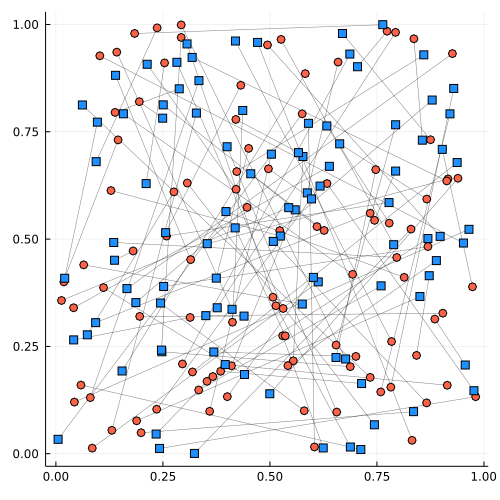

In [22]:
plot_request(data)

In [34]:
pickx, picky, dropx, dropy = extract_location(data)
Xp = [pickx picky]
Xd = [dropx dropy]
X = [Xp' Xd']

2×200 Matrix{Float64}:
 0.138274  0.102601  0.507119  0.58255   …  0.256411  0.759697  0.41879
 0.795205  0.927054  0.364657  0.885475     0.514952  0.391097  0.526097

In [38]:
kres = kmeans(X, 3)

KmeansResult{Matrix{Float64}, Float64, Int64}([0.23455811131310397 0.4756840945145811 0.7633065356926211; 0.26471278387135033 0.7860600373762577 0.33745451769057705], [2, 2, 3, 2, 1, 2, 2, 3, 3, 2  …  2, 1, 3, 1, 1, 2, 2, 1, 3, 2], [0.11392937646679369, 0.1590705062219171, 0.06637227298035375, 0.021303631045880067, 0.04168176224552887, 0.13925787064675044, 0.031860885566083574, 0.12354448884411617, 0.01987497585959086, 0.07998964536547515  …  0.06571095820385775, 0.0665549672377655, 0.024677157803637995, 0.03645704210687839, 0.026100629525709657, 0.013328308124939792, 0.05306505845841181, 0.06309711223272679, 0.0028905516382617957, 0.07081782014584204], [57, 78, 65], [57, 78, 65], 11.709194763354423, 10, true)

In [42]:
cluster = Dict(i => [] for i in 1:3)
for i in 1:size(X, 2)
    j = kres.assignments[i]
    push!(cluster[j], i)
end
println(cluster)

Dict{Int64, Vector{Any}}(2 => [1, 2, 4, 6, 7, 10, 17, 18, 22, 27, 29, 30, 38, 45, 49, 52, 55, 64, 70, 71, 73, 77, 80, 82, 86, 89, 91, 92, 93, 94, 95, 98, 101, 103, 105, 107, 110, 112, 114, 115, 117, 119, 126, 128, 131, 133, 134, 138, 140, 141, 145, 146, 148, 149, 150, 151, 154, 156, 157, 158, 163, 164, 165, 169, 170, 171, 172, 176, 177, 184, 185, 186, 189, 190, 191, 196, 197, 200], 3 => [3, 8, 9, 11, 12, 13, 15, 19, 20, 25, 26, 28, 32, 36, 37, 39, 40, 41, 43, 46, 47, 50, 56, 57, 62, 65, 66, 68, 72, 78, 79, 84, 85, 87, 88, 90, 96, 97, 100, 102, 116, 120, 122, 124, 127, 130, 135, 137, 139, 144, 147, 153, 159, 160, 161, 167, 173, 175, 178, 179, 180, 183, 188, 193, 199], 1 => [5, 14, 16, 21, 23, 24, 31, 33, 34, 35, 42, 44, 48, 51, 53, 54, 58, 59, 60, 61, 63, 67, 69, 74, 75, 76, 81, 83, 99, 104, 106, 108, 109, 111, 113, 118, 121, 123, 125, 129, 132, 136, 142, 143, 152, 155, 162, 166, 168, 174, 181, 182, 187, 192, 194, 195, 198])


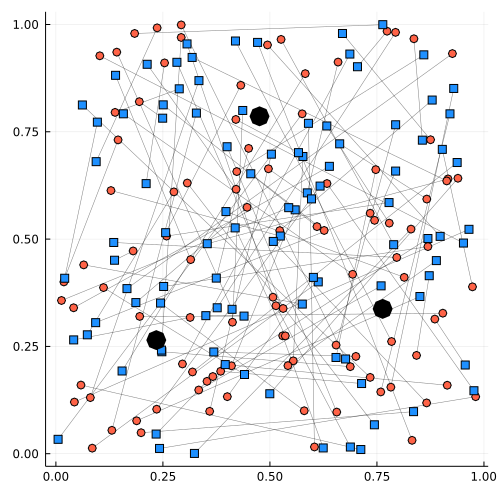

In [48]:
f = plot_request(data)
for j in 1:3
    scatter!(f, kres.centers[1, j:j], kres.centers[2, j:j], label=nothing, marker=:o, ms=10, color=:black)
end
f

In [51]:
function dinter(kres::KmeansResult)
    dsum = 0.0
    k = size(kres.centers, 2)
    for i in 1:k, j in 1:k
        dij = norm(kres.centers[:, i] .- kres.centers[:, j])
        dsum += dij
    end
    dsum
end

println(dinter(kres))

3.2820569602723975


In [61]:
function dintra(X::AbstractMatrix, cluster::Dict, kres::KmeansResult)
    dsum = 0.0
    k = size(kres.centers, 2)
    for i in 1:k
        ci = kres.centers[:, i]
        for j in cluster[i]
            x = X[:, j]
            dij = norm(ci .- x)
            dsum += dij
        end
    end
    dsum
end

println(dintra(X, cluster, kres))

44.91396507164265


In [68]:
function countQ(data::Vector{Request}, cluster::Dict, kres::KmeansResult)
    k = length(cluster)
    Q = zeros(k, k)
    for j in 1:length(data)
        # pi, di = data[j].pick, data[j].drop
        ai = kres.assignments[j]
        aj = kres.assignments[j + length(data)]
        Q[ai, aj] += 1
    end
    Q
end

println(countQ(data, cluster, kres))

[5.0 12.0 12.0; 11.0 14.0 7.0; 12.0 20.0 7.0]


In [69]:
Q = countQ(data, cluster, kres);

In [71]:
function qintra(Q)
    k = size(Q, 1)
    qintra_num = 0.0
    qintra_den = 0.0
    for i in 1:k
        qintra_num += Q[i, i]
        for j in 1:k
            qintra_den += Q[i, j]
        end
    end
    qintra_num / qintra_den
end

println(qintra(Q))

0.26


In [73]:
function qinter(Q)
    k = size(Q, 1)
    qinter_num = 0.0
    qinter_den = 0.0
    for i in 1:k
        for j in 1:k
            (i != j) && (qinter_num += Q[i, j])
            qinter_den += Q[i, j]
        end
    end
    qinter_num / qinter_den
end

println(qinter(Q))

0.74


### check k = 2, ..., 10

In [76]:
log_v1 = []
log_v2 = []
for k in 2:10
    kres = kmeans(X, k)
    
    # cluster
    cluster = Dict(i => [] for i in 1:k)
    for i in 1:size(X, 2)
        j = kres.assignments[i]
        push!(cluster[j], i)
    end
    
    Q = countQ(data, cluster, kres);

    # compute
    dinter_k = dinter(kres)
    dintra_k = dintra(X, cluster, kres)
    qinter_k = qinter(Q)
    qintra_k = qintra(Q)
    
    v1 = min(dintra_k, qintra_k)
    v2 = max(dinter_k, qinter_k)
    push!(log_v1, v1)
    push!(log_v2, v2)
    
    println("$k $v1 [$dintra_k $qintra_k] $v2 [$dinter_k $qinter_k]")
end

2 0.48 [56.20149026943995 0.48] 1.003591679314717 [1.003591679314717 0.52]
3 0.35 [46.02058101277243 0.35] 3.189751787506111 [3.189751787506111 0.65]
4 0.22 [37.06682878237232 0.22] 6.669896084806479 [6.669896084806479 0.78]
5 0.19 [33.21340483696189 0.19] 10.886783096604024 [10.886783096604024 0.81]
6 0.13 [31.109285370247534 0.13] 16.34570632344231 [16.34570632344231 0.87]
7 0.13 [26.8671878587663 0.13] 23.309191074690805 [23.309191074690805 0.87]
8 0.16 [25.936205017178324 0.16] 31.000539771795406 [31.000539771795406 0.84]
9 0.13 [23.712225905137043 0.13] 39.51362285347207 [39.51362285347207 0.87]
10 0.09 [22.904935687134127 0.09] 48.62210369402961 [48.62210369402961 0.91]


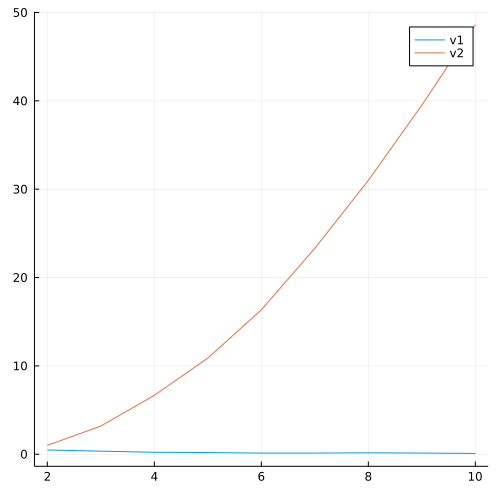

In [81]:
f = plot(size=(500, 500))
plot!(f, 2:10, log_v1, label="v1")
plot!(f, 2:10, log_v2, label="v2")
f